In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('C:\c++\My codes\python\Deep learning\deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


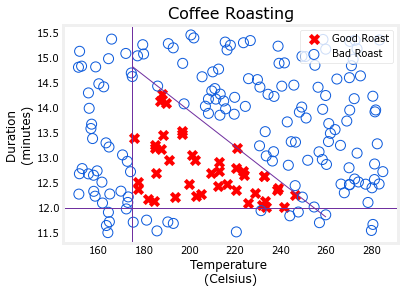

In [3]:
plt_roast(X,Y)

In [5]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [6]:
g = sigmoid

In [41]:
def dense (a_in , w, b) :
    units = w.shape[1]
    a_out = np.zeros(units)
    for i in range(units) :
        W = w[:,i]
        z = np.dot(W,a_in) + b[i]
        a_out = g(z)
    return a_out    

In [42]:
def sequential(x , w1, b1 , w2 , b2) :
    a1 = dense(x,w1,b1)
    a2 = dense(a1,w2,b2)
    return(a2)

In [43]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ],
                    [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )

W2_tmp = np.array( [[-31.18],
                    [-27.59],
                    [-32.56]] )
b2_tmp = np.array( [15.41] )

In [44]:
def predict(X,w1,b1,w2,b2) :
        m = X.shape[0]
        p = np.zeros((m,1))
        for i in range(m):
            p[i,0] = sequential(X[i], w1, b1, w2, b2)
        return(p)

In [45]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [47]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [49]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


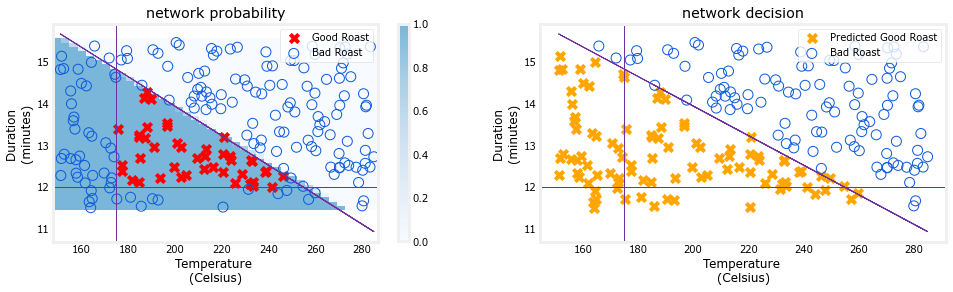

In [52]:
netf= lambda x : predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X,Y,netf)